# ME21B174 FML ASSIGNMENT 1

# Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Before loading the dataset, I have directly added column headers x1, x2 and y on the csv files(both train and test).

In [2]:
# Loading the dataset
train_data = pd.read_csv("FMLA1Q1Data_train.csv")
test_data = pd.read_csv("FMLA1Q1Data_test.csv")

In [3]:
y_train = train_data["y"]
X_train = train_data.drop("y", axis=1)
X_train["x0"] = 1 
print(X_train)
print(y_train)

          x1       x2  x0
0    0.53767  0.67370   1
1    1.83390 -0.66911   1
2   -2.25880 -0.40032   1
3    0.86217 -0.67180   1
4    0.31877  0.57563   1
..       ...      ...  ..
995  1.51060  2.02370   1
996  0.16401  0.77779   1
997 -0.28276 -0.54890   1
998  1.15220 -0.12601   1
999 -1.14650  0.29958   1

[1000 rows x 3 columns]
0       9.7251
1      11.1090
2      22.0270
3       2.4278
4       6.5156
        ...   
995    58.0210
996     7.5994
997     1.5992
998     7.3712
999     3.2247
Name: y, Length: 1000, dtype: float64


In [4]:
y_test = test_data["y"]
X_test = test_data.drop("y", axis=1)
X_test["x0"] = 1
print(X_test)
print(y_test)

         x1        x2  x0
0   0.87060 -0.730160   1
1   0.33076 -0.916330   1
2  -1.34790  1.787600   1
3   1.54790 -0.820400   1
4  -0.61664 -0.196710   1
..      ...       ...  ..
95 -2.10320  0.659230   1
96  0.37392 -1.280400   1
97  0.24518  0.050124   1
98  0.33858  0.548400   1
99 -1.07810  1.778400   1

[100 rows x 3 columns]
0      2.4105
1      1.6318
2     12.3770
3      6.8406
4      1.6138
       ...   
95    10.4300
96     3.9106
97     1.9747
98     6.2960
99    13.0210
Name: y, Length: 100, dtype: float64


In [5]:
w_ml = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(w_ml)

0    1.765706
1    3.521590
2    9.894008
dtype: float64


In [6]:
def gradient_descent (X, y, w, learning_rate, epochs, w_ml, error_function):

    for i in range(epochs):

        gradient = (2 * (X.T @ ((X @ w) - y)))

        w = w - learning_rate * gradient

        error_function[i] = np.sum((w - w_ml) ** 2)

    return w

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
w_ml = np.array(w_ml)
w_init = np.zeros(X_train.shape[1])
epochs = 50
error_function = np.zeros(epochs)


learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for l in learning_rates :
    w = gradient_descent(X_train, y_train, w_init, l, epochs, w_ml, error_function)
    print("Learning rate: ", l)
    print(f"w_obtained: {w}")
    print(f"w_theroretical: {w_ml}")
    print()

Learning rate:  1e-05
w_obtained: [0.98863418 2.36374798 6.31328896]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  0.0001
w_obtained: [1.76561784 3.52159758 9.89385432]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  0.001
w_obtained: [ 623.20827102 -669.48987213 -833.3463862 ]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  0.01
w_obtained: [ 5.02142187e+65 -5.68228868e+65 -7.05121633e+65]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  0.1
w_obtained: [ 4.47749932e+116 -5.10534669e+116 -6.33027851e+116]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  1
w_obtained: [ 5.54354531e+166 -6.32583313e+166 -7.84304483e+166]
w_theroretical: [1.76570568 3.5215898  9.89400832]

Learning rate:  10
w_obtained: [ 5.66292538e+216 -6.46256789e+216 -8.01251882e+216]
w_theroretical: [1.76570568 3.5215898  9.89400832]



C:\Users\sakth\AppData\Local\Temp\ipykernel_16656\2572481711.py:9: RuntimeWarning: overflow encountered in square
  error_function[i] = np.sum((w - w_ml) ** 2)


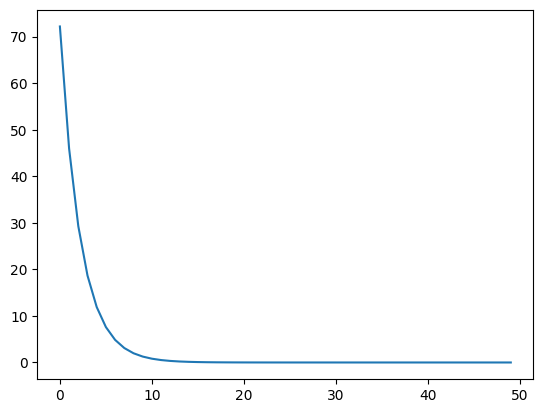

In [8]:
w = gradient_descent(X_train, y_train, w_init, 0.0001, epochs, w_ml, error_function)
plt.plot(error_function)

In [9]:
def stochastic_gradient_descent(train, w, learning_rate, epochs, w_ml, error_function):

    w_sum = 0

    for i in range(epochs):

        random_batch = train.sample(frac = 0.1, replace = False)
        X_rand = random_batch.drop("y", axis = 1)
        y_rand = random_batch["y"]

        gradient = (2 * (X_rand.T @ ((X_rand @ w) - y_rand)))

        w = w - learning_rate * gradient

        error_function[i] = np.sum((w - w_ml) ** 2)

        w_sum = w_sum + w

    w_average = w_sum / epochs
    
    return w_average

In [10]:
w_init = np.zeros(X_train.shape[1])
epochs = 1000
error_function= np.zeros(epochs)

w_stochastic = stochastic_gradient_descent(train_data, w, 0.01, epochs, w_ml, error_function)
print(w_stochastic)

ValueError: Dot product shape mismatch, (100, 2) vs (3,)

In [28]:
def ridge_regresssion(X, y, w, learning_rate, epochs, lamda):

    for i in range(epochs):

        gradient = (2 * (X.T @ ((X @ w) - y)) + 2 * lamda* w) / len(y)

        w = w - learning_rate * gradient

    return w

In [29]:
def error(y_pred, y_true):
    return (np.sum((y_pred - y_true) ** 2)/ len(y_pred))

165.65124787094973
165.65125366644384
165.65131162146125
165.6518911792415
165.6576875173934
165.7157266519064
166.30341720830674
172.68354241502573


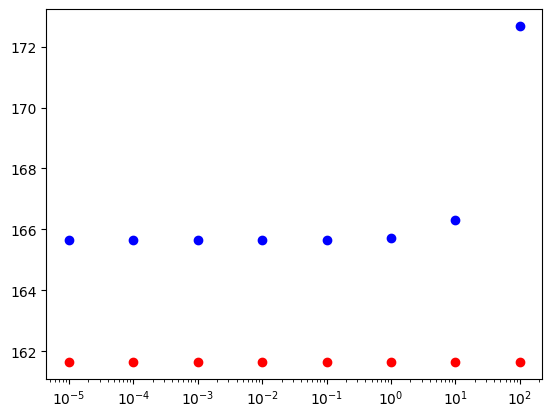

In [33]:
# Train test split

val_split = train_data.iloc[:200, :]
train_split =train_data.iloc[200:, :]

X_train_split = train_split.drop("y", axis = 1)
X_train_split["x0"] = 1
y_train_split = train_split["y"]

X_val_split = val_split.drop("y", axis = 1)
X_val_split["x0"] = 1
y_val_split = val_split["y"]

w_init = np.zeros(X_train.shape[1])
epochs = 1000
lamda = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for l in lamda :

    w_ridge = ridge_regresssion(X_train_split, y_train_split, w_init, 0.1, epochs, l)

    y_val_pred = X_val_split @ w_ridge
    y_val_pred_ml = X_val_split @ w_ml

    print(error(y_val_pred, y_val_split))

    plt.plot(l, error(y_val_pred, y_val_split), 'bo') 
    plt.plot(l, error(y_val_pred_ml, y_val_split), 'ro')
    plt.xscale('log')
    

In [14]:
w_ridge = ridge_regresssion(X_train, y_train, w_init, 0.0001, epochs, 0.001)

y_pred_ridge = X_test @ w_ridge 

y_pred_ml = X_test @ w_ml

ridge_error = error(y_pred_ridge, y_test)
ml_error = error(y_pred_ml, y_test)

print(ridge_error)
print(ml_error) 

155.1617757840709
142.76610663299087
